<a href="https://colab.research.google.com/github/kushiraj18/2203A52030_Deep-Learning/blob/main/2203A52030_Deep_learning_lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
!pip install openpyxl

# Load the Excel file using 'openpyxl' engine
df = pd.read_excel("/content/Load Data in kW.xlsx", engine='openpyxl')
df

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720
...,...
2178,4626.51840
2179,4567.90752
2180,4723.63164
2181,5150.27520


In [3]:
print(df.isnull().sum())

5551.82208    0
dtype: int64


In [4]:
X = df[df.columns[0]].values
y = df[df.columns[0]].values
X = (X - np.mean(X)) / np.std(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

m = 1
c = -1
eta = 0.1
epochs = 100
G_m, G_c = 0, 0

for epoch in range(epochs):
    gradient_m = -np.mean((y_train - (m * X_train + c)) * X_train)
    gradient_c = -np.mean(y_train - (m * X_train + c))

    G_m += gradient_m ** 2
    G_c += gradient_c ** 2

    m -= (eta / np.sqrt(G_m + 1e-8)) * gradient_m
    c -= (eta / np.sqrt(G_c + 1e-8)) * gradient_c

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: m={m:.4f}, c={c:.4f}")

y_train_pred = m * X_train + c
y_test_pred = m * X_test + c

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nPerformance on Training Data:")
print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")

print("\nPerformance on Test Data:")
print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")


Epoch 0: m=1.1000, c=-0.9000
Epoch 10: m=1.5322, c=-0.4678
Epoch 20: m=1.7813, c=-0.2187
Epoch 30: m=1.9765, c=-0.0236
Epoch 40: m=2.1424, c=0.1423
Epoch 50: m=2.2892, c=0.2892
Epoch 60: m=2.4224, c=0.4223
Epoch 70: m=2.5451, c=0.5451
Epoch 80: m=2.6595, c=0.6594
Epoch 90: m=2.7670, c=0.7670

Performance on Training Data:
MSE: 367583559.6044, RMSE: 19172.4688, MAE: 6428.6962

Performance on Test Data:
MSE: 37983532.4223, RMSE: 6163.0782, MAE: 6070.4546


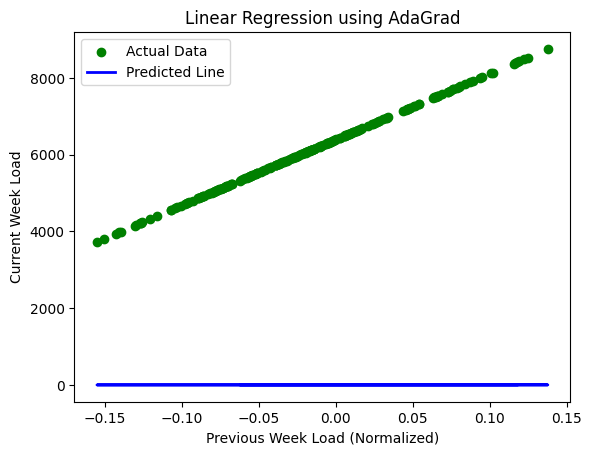

In [7]:
# Plot regression line
plt.scatter(X_test, y_test, color="green", label="Actual Data")
plt.plot(X_test, y_test_pred, color="blue", linewidth=2, label="Predicted Line")
plt.xlabel("Previous Week Load (Normalized)")
plt.ylabel("Current Week Load")
plt.legend()
plt.title("Linear Regression using AdaGrad")
plt.show()